<a href="https://colab.research.google.com/github/larico1599/Forecast_Puno_60kv/blob/master/Explorar_datos_opcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # permiso de acceso a las carpetas de google drive


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a= 0
array = [0]
for i in range(0,24,1):
  for num in range(0,3 ):
      i = i+ 0.15
      array.append(i)
      if  num==2:
        array.append((i-0.45)+1 )
array.pop(96)
array
horas = np.array(array)


In [ ]:
df_estaciones = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Tesis/PERFIL_ULTIMO3.xlsx')#index_col=1
df_estaciones=df_estaciones.set_index(["Estacion del año","Fecha","Dia","Feriado"])
print(df_estaciones.shape)

df_anios = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Tesis/PERFIL_ULTIMO3.xlsx')#index_col=1
#df_anios=df_anios.set_index(["Fecha","Estacion del año","Dia","Feriado"])
print(df_anios.shape)


(1339, 98)
(1339, 102)


In [ ]:
anio_2018 = df_anios[df_anios["Fecha"].dt.year==2018]
anio_2018 = anio_2018.set_index(["Fecha"])
anio_2018 = anio_2018.iloc[:,4:101]

anio_2019 = df_anios[df_anios["Fecha"].dt.year==2019]
anio_2019 = anio_2019.set_index(["Fecha"])
anio_2019 = anio_2019.iloc[:,4:101]

anio_2020 = df_anios[df_anios["Fecha"].dt.year==2020]
anio_2020 = anio_2020.set_index(["Fecha"])
anio_2020 = anio_2020.iloc[:,4:101]

anio_2021 = df_anios[df_anios["Fecha"].dt.year==2021]
anio_2021 = anio_2021.set_index(["Fecha"])
anio_2021 = anio_2021.iloc[:,4:101]
print(anio_2018.shape)
print(anio_2019.shape)
print(anio_2020.shape)
print(anio_2021.shape)



(365, 97)
(365, 97)
(366, 97)
(243, 97)


In [ ]:
verano_2018 = df_estaciones.loc[1.0,:].loc["2018",:].iloc[:,1:]
otonio_2018 = df_estaciones.loc[0.25,:].loc["2018",:].iloc[:,1:]
invierno_2018 = df_estaciones.loc[0.50,:].loc["2018",:].iloc[:,1:]
primavera_2018 = df_estaciones.loc[0.75,:].loc["2018",:].iloc[:,1:]

verano_2019 = df_estaciones.loc[1.0,:].loc["2019",:].iloc[:,1:]
otonio_2019 = df_estaciones.loc[0.25,:].loc["2019",:].iloc[:,1:]
invierno_2019 = df_estaciones.loc[0.50,:].loc["2019",:].iloc[:,1:]
primavera_2019 = df_estaciones.loc[0.75,:].loc["2019",:].iloc[:,1:]

verano_2020 = df_estaciones.loc[1.0,:].loc["2020",:].iloc[:,1:]
otonio_2020 = df_estaciones.loc[0.25,:].loc["2020",:].iloc[:,1:]
invierno_2020 = df_estaciones.loc[0.50,:].loc["2020",:].iloc[:,1:]
primavera_2020 = df_estaciones.loc[0.75,:].loc["2020",:].iloc[:,1:]

verano_2021 = df_estaciones.loc[1.0,:].loc["2021",:].iloc[:,1:]
otonio_2021 = df_estaciones.loc[0.25,:].loc["2021",:].iloc[:,1:]
invierno_2021 = df_estaciones.loc[0.50,:].loc["2021",:].iloc[:,1:]
primavera_2021 = df_estaciones.loc[0.75,:].loc["2021",:].iloc[:,1:]



In [ ]:
def grafica(df1,df2,df3,df4,horas,titulo,a,b,c,d):
  
  fig1,ax=plt.subplots(2,2)
  fig1.set_size_inches(10,8)

  array=[len(df1),len(df2),len(df3), len(df4) ]
  array2 =[df1,df2,df3,df4]
  x = 0
  for i in array:
    for j in range(0,i):
      if x==0:
        ax[0,0].plot(  horas, array2[x].iloc[j,0:96] )   
      elif x==1:
        ax[0,1].plot(  horas, array2[x].iloc[j,0:96] ) 
      elif x==2:
        ax[1,0].plot(  horas, array2[x].iloc[j,0:96] )   
      elif x==3:
        ax[1,1].plot(  horas, array2[x].iloc[j,0:96] )   

    x=x+1
      
  plt.xlabel("Horas")
  plt.ylabel('Potencia (MW-H)')
  ax[0,0].set_title(a)
  ax[0,1].set_title(b)
  ax[1,0].set_title(c)
  ax[1,1].set_title(d)

  plt.suptitle(f' {titulo}',fontsize=20)
  #fig.tight_layout()

#Comportamiento de la Carga por años 2018-2019-2020-(2021-agosto)

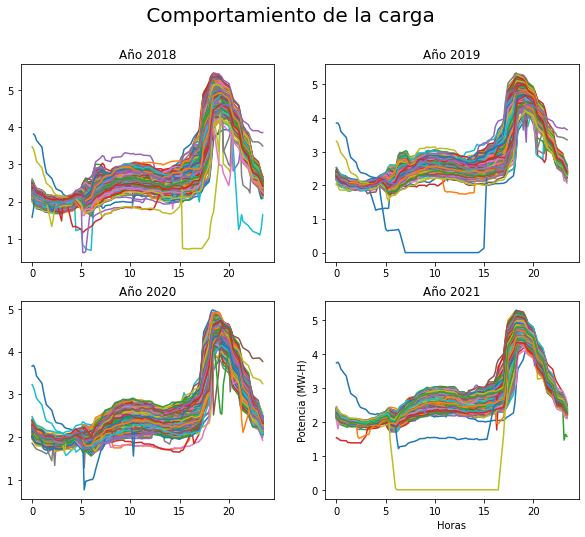

In [ ]:
titulo = "Comportamiento de la carga "
a="Año 2018"
b="Año 2019"
c="Año 2020"
d="Año 2021"
grafica(anio_2018,anio_2019,anio_2020,anio_2021,horas,titulo,a,b,c,d )

In [ ]:
print("Estadisticas del comportamiento de la carga - 2018 ")
print("Total Energia",np.sum( np.array(anio_2018["Total-Dia"])),"MW-H" )
print(anio_2018["Total-Dia"].describe())
print("\n")

print("Estadisticas del comportamiento de la carga - 2019 ")
print("Total Energia",np.sum( np.array(anio_2019["Total-Dia"])),"MW-H" )
print(anio_2019["Total-Dia"].describe())
print("\n")

print("Estadisticas del comportamiento de la carga - 2020 ")
print("Total Energia",np.sum( np.array(anio_2020["Total-Dia"])),"MW-H" )
print(anio_2020["Total-Dia"].describe())
print("\n")

print("Estadisticas del comportamiento de la carga - 2020, hasta el mes de agosto ")
print("Total Energia",np.sum( np.array(anio_2021["Total-Dia"])),"MW-H" )
print(anio_2021["Total-Dia"].describe())

Estadisticas del comportamiento de la carga - 2018 
Total Energia 98159.1 MW-H
count    365.000000
mean     268.929041
std       14.800324
min      229.310000
25%      258.260000
50%      270.010000
75%      280.970000
max      304.000000
Name: Total-Dia, dtype: float64


Estadisticas del comportamiento de la carga - 2019 
Total Energia 98020.51000000001 MW-H
count    365.000000
mean     268.549342
std       13.482864
min      170.130000
25%      260.100000
50%      269.020000
75%      278.400000
max      301.470000
Name: Total-Dia, dtype: float64


Estadisticas del comportamiento de la carga - 2020 
Total Energia 90759.44999999998 MW-H
count    366.000000
mean     247.976639
std       12.716621
min      217.960000
25%      237.900000
50%      250.750000
75%      259.040000
max      270.760000
Name: Total-Dia, dtype: float64


Estadisticas del comportamiento de la carga - 2020, hasta el mes de agosto 
Total Energia 63985.78999999999 MW-H
count    243.000000
mean     263.316008
std     

Como se observa en la grafica del año 2019 y 2021 la demanda tiene valores 0 en un rango desde las 5 hasta las 15hr, se procede a ubicar esos datos 

In [ ]:
print(anio_2019[anio_2019["Total-Dia"]< 220])
print(anio_2021[anio_2021["Total-Dia"]< 210])

#Dias con valores "0"
dia_erro1 = anio_2019.loc["2019-11-17",:]
dia_erro1 = np.array(dia_erro1)
dia_erro1 = np.delete(dia_erro1,-1)

dia_erro2 = anio_2021.loc["2021-07-18"]
dia_erro2 = np.array(dia_erro2)
dia_erro2 = np.delete(dia_erro2,-1)

print(dia_erro1.shape)
print(dia_erro2.shape)


            12:00:00 AM  12:15:00 AM  ...  11:45:00 PM  Total-Dia
Fecha                                 ...                        
2019-11-17         2.38         2.32  ...         2.36     170.13

[1 rows x 97 columns]
            12:00:00 AM  12:15:00 AM  ...  11:45:00 PM  Total-Dia
Fecha                                 ...                        
2021-07-18         2.42         2.35  ...         2.36     154.81

[1 rows x 97 columns]
(96,)
(96,)


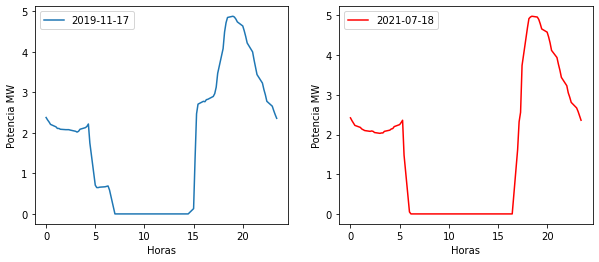

In [ ]:
plt.figure(figsize=(10,4))
fig2=plt.subplot(1,2,1)
plt.plot( horas,dia_erro1 ,label="2019-11-17")
plt.xlabel("Horas")
plt.ylabel("Potencia MW")
plt.legend()

fig2=plt.subplot(1,2,2)
plt.plot(horas,dia_erro2,"r", label="2021-07-18")
plt.xlabel("Horas")
plt.ylabel("Potencia MW")
plt.legend()

Se observa en las graficas que la Potencia disminuyo a valores 0, esto podria ser debido al mantenimiento de la barra o debido a errores en los datos

# Comportamiento de la carga por estaciones

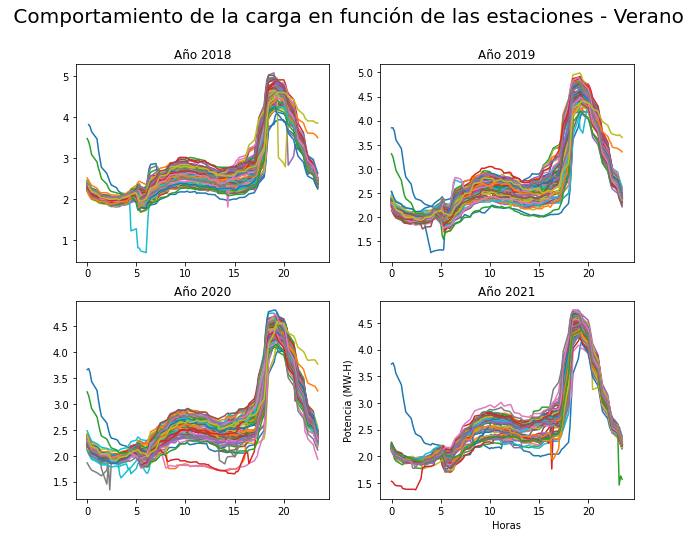

In [ ]:
titulo = "Comportamiento de la carga en función de las estaciones - Verano"
a="Año 2018"
b="Año 2019"
c="Año 2020"
d="Año 2021"
grafica(verano_2018,verano_2019,verano_2020,verano_2021,horas,titulo,a,b,c,d )


In [ ]:
print("Estadisticas del comportamiento de la carga Verano-2018")
print("Total Energia",np.sum( np.array(verano_2018["Total-Dia"])),"MW-H" )
print(verano_2018["Total-Dia"].describe())
print("\n")

print("Estadisticas del comportamiento de la carga Verano-2019")
print("Total Energia",np.sum( np.array(verano_2019["Total-Dia"])),"MW-H" )
print(verano_2019["Total-Dia"].describe())
print("\n")

print("Estadisticas del comportamiento de la carga Verano-2020")
print("Total Energia",np.sum( np.array(verano_2020["Total-Dia"])),"MW-H" )
print(verano_2020["Total-Dia"].describe())
print("\n")

print("Estadisticas del comportamiento de la carga Verano-2021")
print("Total Energia",np.sum( np.array(verano_2021["Total-Dia"])),"MW-H" )
print(verano_2021["Total-Dia"].describe())

Estadisticas del comportamiento de la carga Verano-2018
Total Energia 23060.98 MW-H
count     89.000000
mean     259.112135
std       10.860444
min      233.100000
25%      251.530000
50%      261.790000
75%      266.450000
max      276.810000
Name: Total-Dia, dtype: float64


Estadisticas del comportamiento de la carga Verano-2019
Total Energia 23303.299999999996 MW-H
count     89.000000
mean     261.834831
std        9.948321
min      235.330000
25%      254.870000
50%      264.050000
75%      268.780000
max      281.970000
Name: Total-Dia, dtype: float64


Estadisticas del comportamiento de la carga Verano-2020
Total Energia 22720.21 MW-H
count     89.000000
mean     255.283258
std       10.540351
min      221.090000
25%      249.270000
50%      258.960000
75%      261.680000
max      270.760000
Name: Total-Dia, dtype: float64


Estadisticas del comportamiento de la carga Verano-2021
Total Energia 19621.4 MW-H
count     78.00000
mean     251.55641
std        8.46021
min      233.320

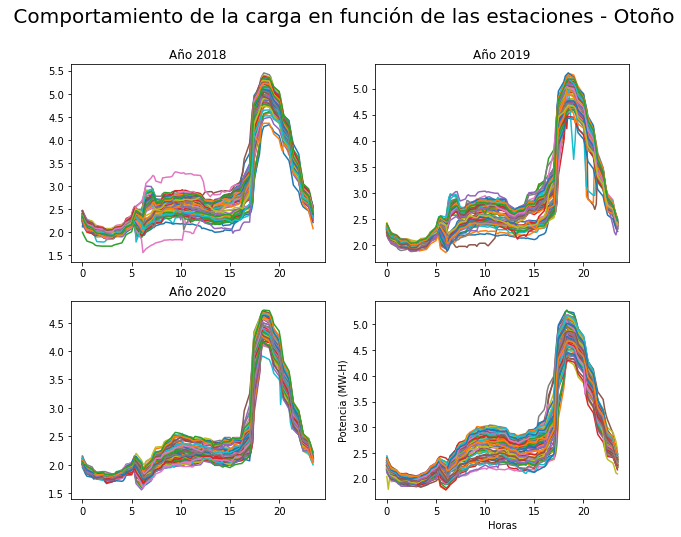

In [ ]:
titulo = "Comportamiento de la carga en función de las estaciones - Otoño"
a="Año 2018"
b="Año 2019"
c="Año 2020"
d="Año 2021"
grafica(otonio_2018,otonio_2019,otonio_2020,otonio_2021,horas,titulo,a,b,c,d)

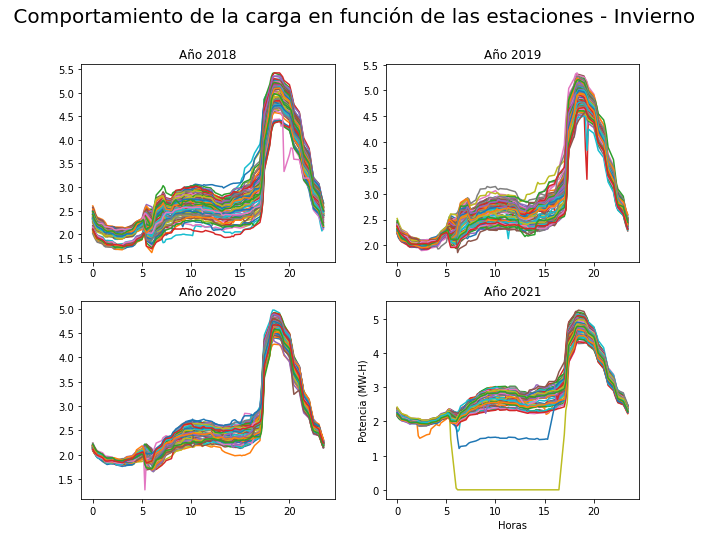

In [ ]:
titulo = "Comportamiento de la carga en función de las estaciones - Invierno"
a="Año 2018"
b="Año 2019"
c="Año 2020"
d="Año 2021"
grafica(invierno_2018,invierno_2019,invierno_2020,invierno_2021,horas,titulo,a,b,c,d)

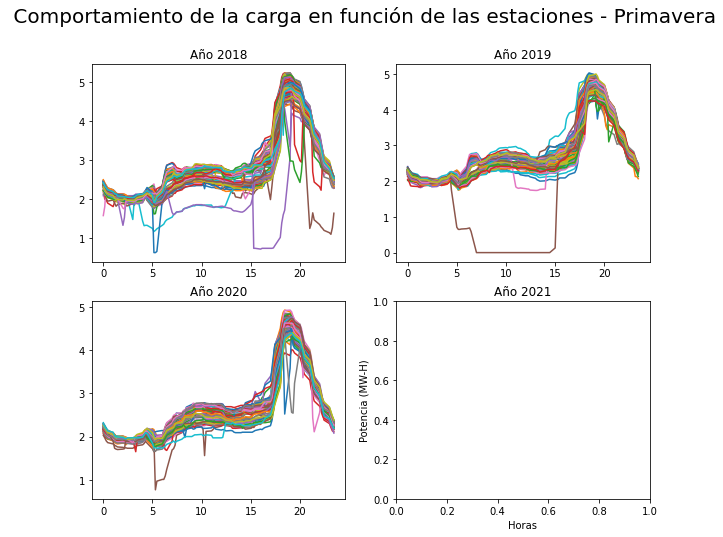

In [ ]:
titulo = "Comportamiento de la carga en función de las estaciones - Primavera"
a="Año 2018"
b="Año 2019"
c="Año 2020"
d="Año 2021"
grafica(primavera_2018,primavera_2019,primavera_2020,primavera_2021,horas,titulo,a,b,c,d)


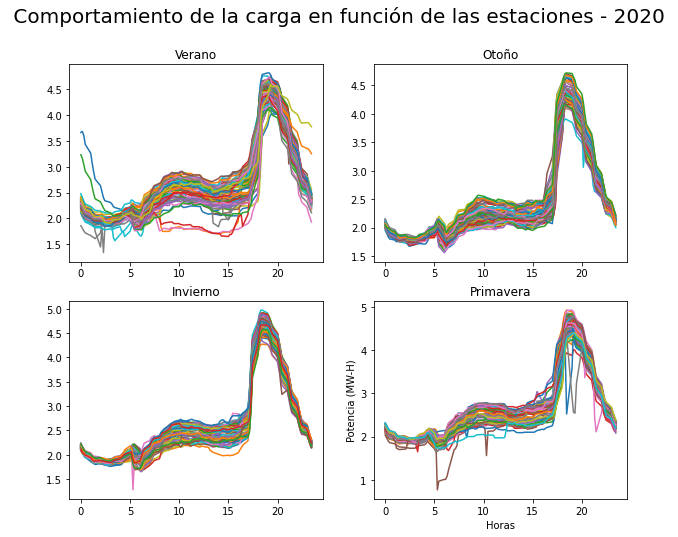

In [ ]:
titulo = "Comportamiento de la carga en función de las estaciones - 2020 "
a="Verano"
b="Otoño"
c="Invierno"
d="Primavera"
grafica(verano_2020,otonio_2020,invierno_2020,primavera_2020,horas,titulo,a,b,c,d)


#Comportamiento de la demanda por dias en una semana

In [ ]:
df_semana_2018 = df_anios.loc[7:13,:].iloc[:,5:-1]
df_semana_2018

,12:00:00 AM,12:15:00 AM,12:30:00 AM,12:45:00 AM,1:00:00 AM,1:15:00 AM,1:30:00 AM,1:45:00 AM,2:00:00 AM,2:15:00 AM,2:30:00 AM,2:45:00 AM,3:00:00 AM,3:15:00 AM,3:30:00 AM,3:45:00 AM,4:00:00 AM,4:15:00 AM,4:30:00 AM,4:45:00 AM,5:00:00 AM,5:15:00 AM,5:30:00 AM,5:45:00 AM,6:00:00 AM,6:15:00 AM,6:30:00 AM,6:45:00 AM,7:00:00 AM,7:15:00 AM,7:30:00 AM,7:45:00 AM,8:00:00 AM,8:15:00 AM,8:30:00 AM,8:45:00 AM,9:00:00 AM,9:15:00 AM,9:30:00 AM,9:45:00 AM,...,2:00:00 PM,2:15:00 PM,2:30:00 PM,2:45:00 PM,3:00:00 PM,3:15:00 PM,3:30:00 PM,3:45:00 PM,4:00:00 PM,4:15:00 PM,4:30:00 PM,4:45:00 PM,5:00:00 PM,5:15:00 PM,5:30:00 PM,5:45:00 PM,6:00:00 PM,6:15:00 PM,6:30:00 PM,6:45:00 PM,7:00:00 PM,7:15:00 PM,7:30:00 PM,7:45:00 PM,8:00:00 PM,8:15:00 PM,8:30:00 PM,8:45:00 PM,9:00:00 PM,9:15:00 PM,9:30:00 PM,9:45:00 PM,10:00:00 PM,10:15:00 PM,10:30:00 PM,10:45:00 PM,11:00:00 PM,11:15:00 PM,11:30:00 PM,11:45:00 PM
7,2.26,2.18,2.12,2.07,2.01,1.95,1.92,1.93,1.92,1.91,1.92,1.88,1.87,1.89,1.89,1.84,1.90,1.97,2.00,2.02,2.08,2.11,2.07,2.02,2.06,2.13,2.21,2.31,2.40,2.50,2.57,2.57,2.57,2.57,2.64,2.69,2.72,2.73,2.71,2.74,...,2.56,2.59,2.61,2.63,2.63,2.66,2.69,2.71,2.69,2.70,2.72,2.76,2.82,2.85,2.91,2.97,3.05,3.25,3.73,4.22,4.57,4.71,4.75,4.68,4.59,4.54,4.45,4.34,4.19,4.00,3.82,3.66,3.44,3.26,3.09,2.92,2.83,2.69,2.53,2.41
8,2.33,2.25,2.17,2.10,2.04,1.99,1.97,1.96,1.94,1.90,1.89,1.88,1.87,1.88,1.91,1.92,1.90,1.95,1.97,2.02,2.08,2.06,1.96,1.90,1.91,1.98,2.09,2.13,2.26,2.33,2.38,2.38,2.36,2.42,2.48,2.55,2.61,2.64,2.71,2.76,...,2.47,2.47,2.50,2.52,2.54,2.60,2.65,2.67,2.67,2.70,2.72,2.75,2.74,2.85,3.07,3.24,3.40,3.65,4.09,4.44,4.67,4.78,4.80,4.81,4.75,4.63,4.49,4.34,4.16,3.95,3.78,3.58,3.37,3.21,3.03,2.87,2.74,2.62,2.50,2.39
9,2.31,2.23,2.14,2.07,2.03,2.03,2.01,1.97,1.95,1.95,1.96,1.93,1.92,1.92,1.95,1.96,1.95,1.96,2.01,2.03,2.07,2.14,2.06,1.94,1.96,2.04,2.14,2.24,2.34,2.41,2.48,2.49,2.46,2.54,2.64,2.67,2.71,2.74,2.75,2.78,...,2.51,2.53,2.55,2.58,2.59,2.63,2.64,2.64,2.64,2.62,2.61,2.61,2.63,2.66,2.69,2.77,2.87,3.05,3.59,4.21,4.64,4.83,4.88,4.86,4.81,4.72,4.59,4.46,4.30,4.13,3.91,3.72,3.56,3.34,3.14,2.99,2.85,2.72,2.60,2.48
10,2.38,2.28,2.21,2.15,2.10,2.04,1.99,1.99,1.98,1.94,1.92,1.90,1.90,1.93,1.95,1.95,1.96,1.97,2.00,2.05,2.10,2.16,2.11,1.96,1.95,1.99,2.11,2.21,2.30,2.37,2.42,2.46,2.48,2.50,2.56,2.61,2.63,2.64,2.66,2.67,...,2.40,2.42,2.46,2.48,2.50,2.51,2.52,2.56,2.60,2.65,2.68,2.73,2.81,2.91,3.11,3.29,3.49,3.84,4.28,4.58,4.75,4.82,4.82,4.75,4.68,4.57,4.43,4.30,4.12,3.94,3.75,3.54,3.37,3.20,3.01,2.86,2.75,2.61,2.50,2.42
11,2.34,2.24,2.17,2.11,2.05,2.00,1.96,1.95,1.95,1.95,1.93,1.92,1.91,1.90,1.92,1.95,1.97,1.97,2.00,2.06,2.10,2.14,2.09,2.04,2.00,2.06,2.15,2.24,2.33,2.40,2.50,2.51,2.53,2.55,2.62,2.68,2.72,2.75,2.77,2.79,...,2.56,2.57,2.62,2.66,2.75,2.81,2.88,2.90,2.94,2.95,3.02,3.14,3.23,3.31,3.42,3.55,3.76,4.05,4.34,4.61,4.74,4.82,4.80,4.73,4.66,4.57,4.44,4.28,4.10,3.93,3.70,3.52,3.36,3.17,2.97,2.88,2.77,2.67,2.53,2.42
12,2.32,2.25,2.18,2.12,2.07,2.02,1.99,1.97,1.98,1.97,1.92,1.90,1.90,1.90,1.91,1.91,1.93,1.94,1.97,2.02,2.07,2.12,1.97,1.81,1.86,1.93,1.98,2.07,2.14,2.21,2.26,2.30,2.32,2.38,2.41,2.43,2.48,2.48,2.50,2.48,...,2.33,2.33,2.34,2.34,2.36,2.35,2.35,2.36,2.35,2.39,2.39,2.46,2.52,2.60,2.80,2.97,3.12,3.17,3.52,4.03,4.37,4.52,4.56,4.52,4.48,4.41,4.30,4.18,3.99,3.84,3.67,3.50,3.35,3.14,2.99,2.85,2.74,2.65,2.52,2.42
13,2.35,2.27,2.20,2.14,2.09,2.03,1.99,1.97,1.98,1.96,1.92,1.92,1.93,1.91,1.92,1.95,1.97,1.99,2.05,2.09,2.12,2.12,1.98,1.78,1.77,1.83,1.84,1.89,1.95,2.01,2.06,2.09,2.14,2.15,2.22,2.25,2.24,2.25,2.28,2.27,...,2.14,2.14,2.16,2.18,2.18,2.15,2.17,2.16,2.16,2.21,2.25,2.27,2.29,2.31,2.37,2.47,2.72,3.19,3.65,3.97,4.15,4.20,4.21,4.26,4.30,4.24,4.13,4.01,3.85,3.70,3.54,3.36,3.21,3.03,2.74,2.68,2.59,2.52,2.40,2.29


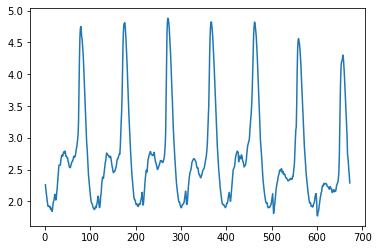

In [ ]:
dia_2018=np.array(df_semana_2018)
dia_2018 = dia_2018.reshape(672,1)
dias = np.arange(1,673)

plt.plot(dias,dia_2018)
